In [2]:
import numpy as np
import math
import cmath
import cv2
from matplotlib import pyplot as plt
import time


# Q1. The Fuzzy Scanner

In [315]:
def deg_func(T,a,b,u,v):
    pi = math.pi
    const = pi*(u*a+v*b)
    if(const==0):
        k = T
    else:
        k = T*math.sin(const)/const
    return cmath.exp(0+ 1j*const*-1)*k


def filter(image,T,a,b):
    img = image.copy()
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    size = img.shape
    out_fft = np.zeros(size,dtype=np.clongdouble)

    for i in range(size[0]):
        for j in range(size[1]):
            out_fft[i,j] = (deg_func(T,a,b,i-size[0]//2,j-size[1]//2))*img_fft[i,j]

    output = np.fft.ifft2(np.fft.ifftshift(out_fft))
    return output,out_fft
    


## 1.2

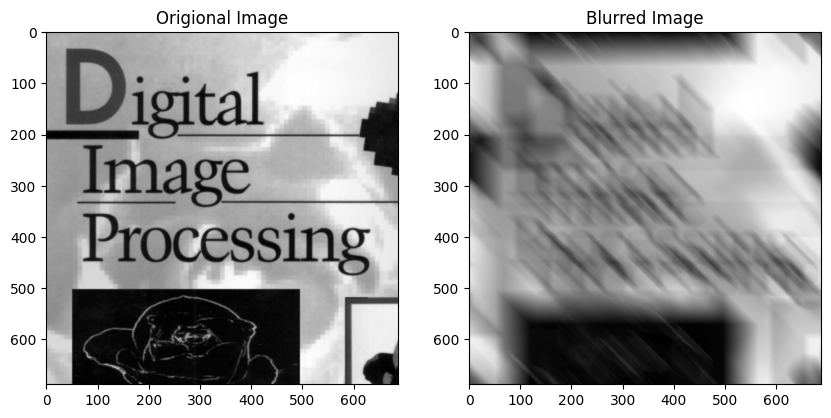

In [316]:
image = cv2.imread("../imgs/book.jpg",0)
a = 0.1
b = 0.1
t = 1
output,out_fft = filter(image,t,a,b)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title("Origional Image")
plt.imshow(image,cmap='gray')
plt.subplot(122)
plt.title("Blurred Image")
plt.imshow(np.real(output),cmap='gray')

## 1.3

In [317]:
def gauss_noise(image,mean,var):
    img = image.copy()
    sigma = var**0.5
    row,col = img.shape
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = img + gauss

    return noisy

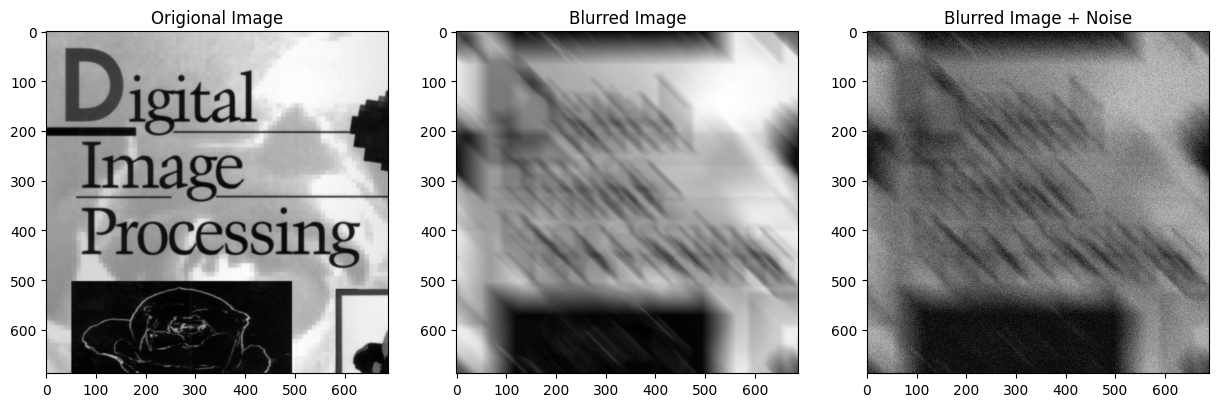

In [318]:
mean = 0
var = 650
output_noise = gauss_noise(output,mean,var)

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.title("Origional Image")
plt.imshow(image,cmap='gray')
plt.subplot(132)
plt.title("Blurred Image")
plt.imshow(abs(output),cmap='gray')
plt.subplot(133)
plt.title("Blurred Image + Noise")
plt.imshow(abs(output_noise),cmap='gray')

## 1.4

In [319]:
def inv_filter(image,T,a,b):
    img = image.copy()
    # img_fft = img.copy()
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    size = img.shape
    out_fft = np.zeros(size,dtype=np.clongdouble)

    for i in range(size[0]):
        for j in range(size[1]):
            # out_fft[i,j] = img_fft[i,j]*deg_func(T,a,b,i-size[0]//2,j-size[1]//2)
            out_fft[i,j] = img_fft[i,j]/(deg_func(T,a,b,i-size[0]//2,j-size[1]//2))
            
    output = np.fft.ifft2(np.fft.ifftshift(out_fft))
    return output

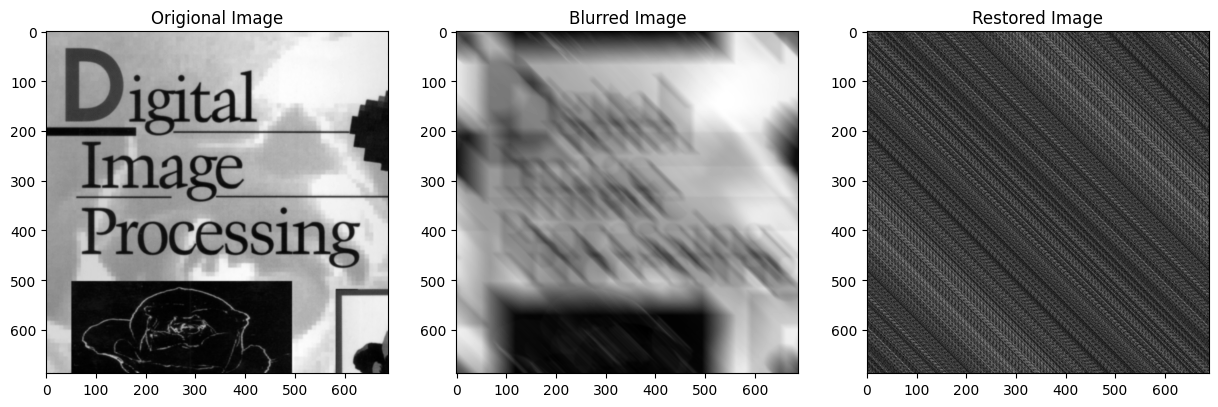

In [320]:
output,out_fft = filter(image,t,a,b)
# output_noise = gauss_noise(output,mean,20)
restored = inv_filter(output,1,0.1,0.1)
# out_fft2 = np.fft.fftshift(np.fft.fft2(output))

# print(np.array_equal(abs(out_fft),abs(out_fft2)))

plt.figure(figsize=(15,15))
plt.subplot(131)
plt.title("Origional Image")
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(132)
plt.title("Blurred Image")
plt.imshow(abs(output),cmap='gray')
plt.subplot(133)
plt.title("Restored Image") 
plt.imshow(abs(restored),cmap='gray')

In [321]:
def weiner_filter(image,k,T,a,b):
    img = image.copy()
    img_fft = np.fft.fftshift(np.fft.fft2(img))
    size = img.shape
    out_fft = np.zeros(size,dtype=np.clongdouble)

    for i in range(size[0]):
        for j in range(size[1]):
            const = deg_func(T,a,b,i-size[0]//2,j-size[1]//2)
            out_fft[i,j] = (abs(const)**2/(abs(const)**2+k))*(img_fft[i,j]/const)
    
    output = np.fft.ifft2(np.fft.ifftshift(out_fft))
    return output

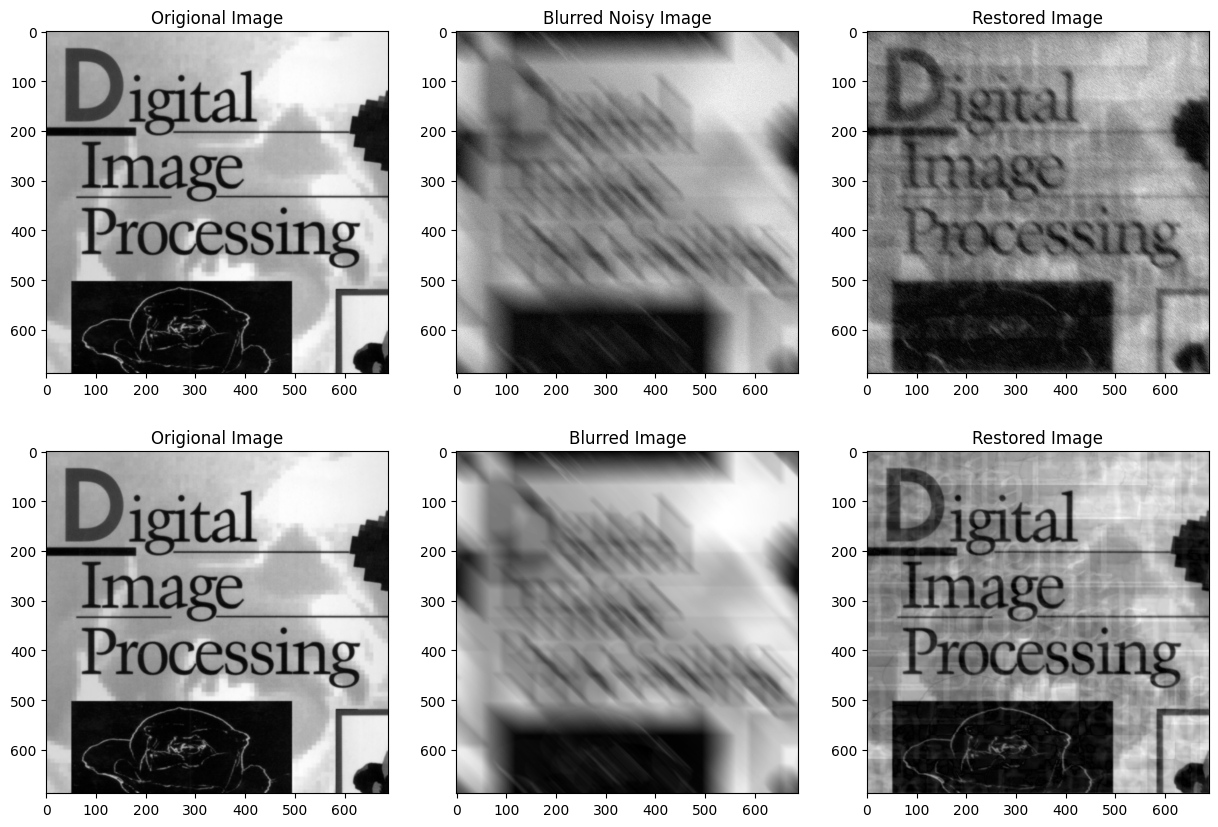

In [339]:
restored = weiner_filter(output_noise,0.01,1,0.1,0.1)
restored_blur = weiner_filter(output,0.0001,1,0.1,0.1)

plt.figure(figsize=(15,10))
plt.subplot(231)
plt.title("Origional Image")
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(232)
plt.title("Blurred Noisy Image")
plt.imshow(abs(output_noise),cmap='gray')
plt.subplot(233)
plt.title("Restored Image")
plt.imshow(abs(restored),cmap='gray')
plt.subplot(234)
plt.title("Origional Image")
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.subplot(235)
plt.title("Blurred Image")
plt.imshow(abs(output),cmap='gray')
plt.subplot(236)
plt.title("Restored Image")
plt.imshow(abs(restored_blur),cmap='gray')



## 1.5

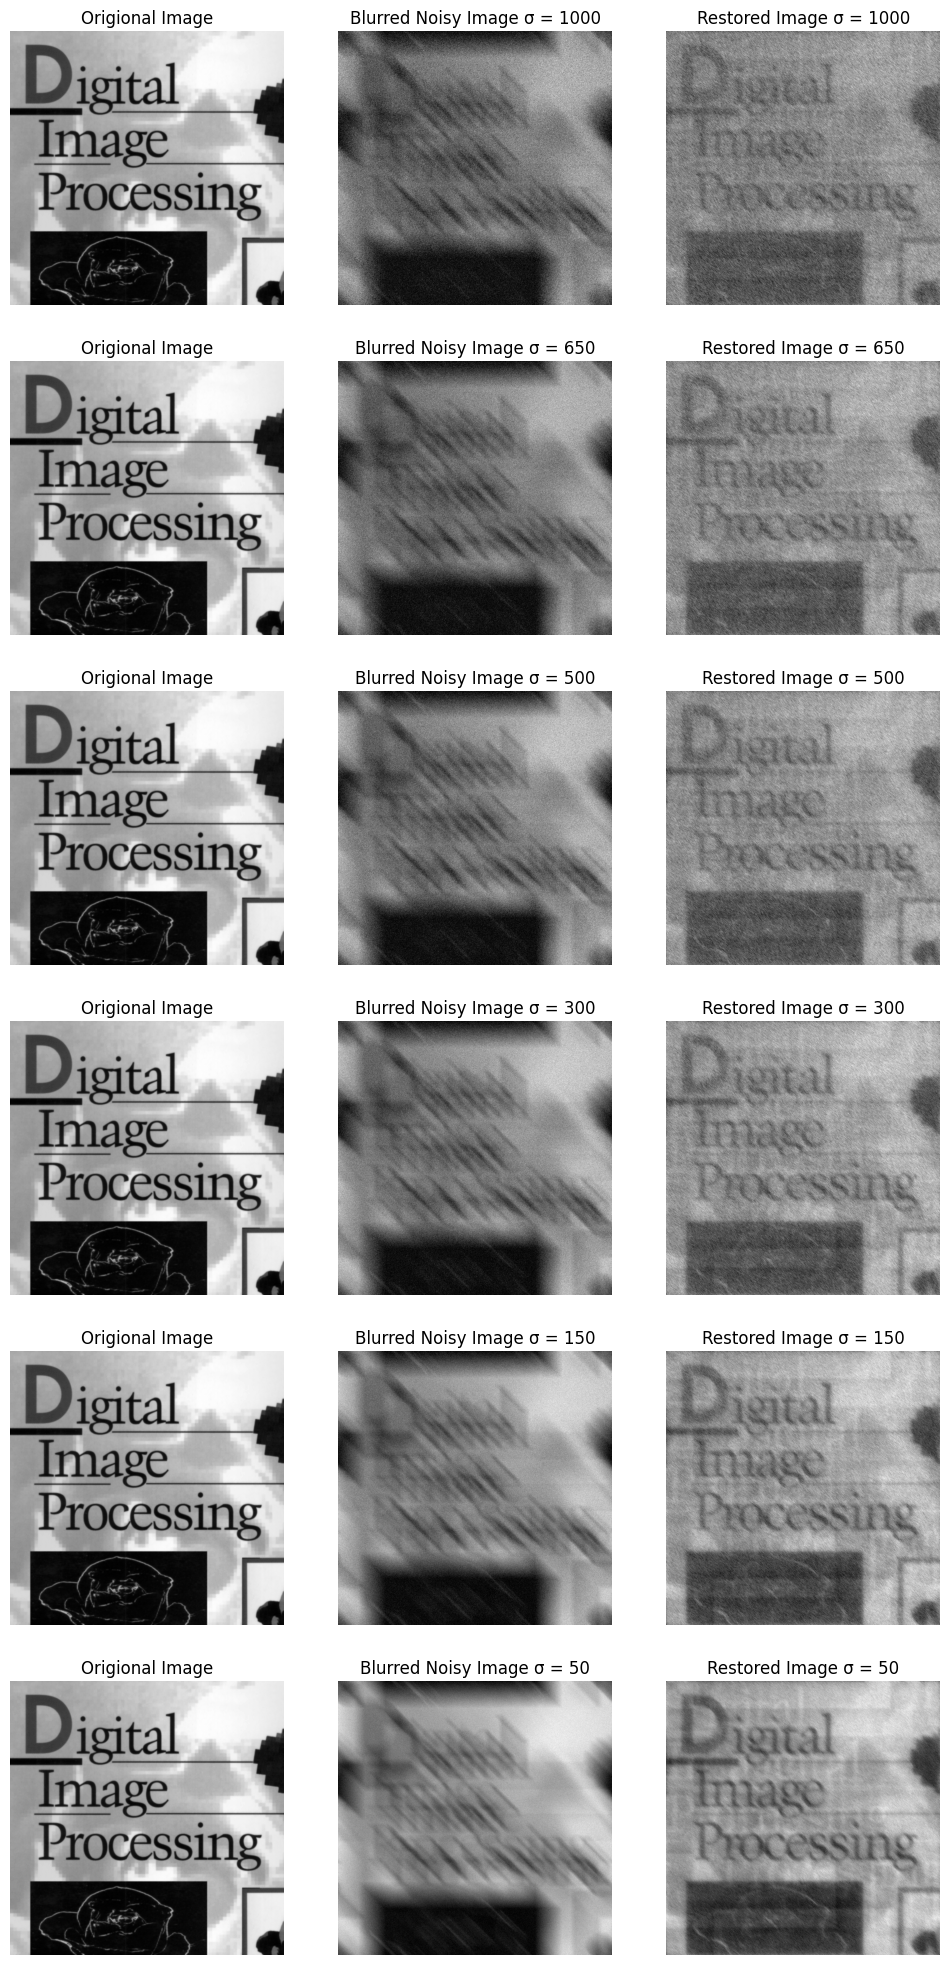

In [373]:
image = cv2.imread("../imgs/book.jpg",0)
mean = 0
var = [1000,650,500,300,150,50]
plt.figure(figsize=(12,25))
for i in range(len(var)):
    output_noise = gauss_noise(output,mean,var[i])
    restored = weiner_filter(output_noise,0.01,1,0.1,0.1)
    plt.subplot(len(var),3,i*3+1)
    plt.title("Origional Image")
    plt.imshow(image,cmap='gray',vmin=0,vmax=255)
    plt.axis(False)
    plt.subplot(len(var),3,i*3+2)
    plt.title("Blurred Noisy Image \u03C3 = "+str(var[i]))
    plt.imshow(abs(output_noise),cmap='gray')
    plt.axis(False)
    plt.subplot(len(var),3,i*3+3)
    plt.title("Restored Image \u03C3 = "+str(var[i]))
    plt.imshow(np.real(restored),cmap='gray')
    plt.axis(False)

plt.show()


The weiner filter when we the noise ratio = 0.01, as the variance of the noise decreases the quality of the restored images increases, that is the restored imgae becomes more and more similar as the origional image. If we further decrease the noise ratio although the image details are resported but there is a white hazing effect on the image. 

# Q2. Data transfer

## Huffman Coding

In [354]:
class HuffmanNodes:
    def __init__(self, prob,val,depth=0 ,left=None, right=None):
        self.left = left
        self.right = right
        self.depth = depth
        self.val = val
        self.prob = prob
        self.code = ''

class pdf:
    def __init__(self,val,prob):
        self.val = val
        self.prob = prob

In [341]:
def huffman_coding(probs,vals):
    nodes = []
    for i in range(len(probs)):
        nodes.append(HuffmanNodes(probs[i],vals[i],len(probs)+1))
    while len(nodes) > 1:
        nodes = sorted(nodes, key=lambda x: (x.prob,x.depth))
        left = nodes[0]
        right = nodes[1]
        left.code =  '0'
        right.code = '1'
        dep = min(left.depth,right.depth)
        left.depth = dep
        right.depth = dep
        new_node = HuffmanNodes(left.prob + right.prob,0, dep-1,left, right)
        nodes.remove(left)
        nodes.remove(right)
        nodes.append(new_node)
    return nodes[0]
    
    

In [355]:
def find_codes(node, Codes={}, Key_codes={}, val=''):
    newVal = val + str(node.code)
    
    if(node.left):
        [Codes, Key_codes] = find_codes(node.left, Codes, Key_codes, newVal)
    
    if(node.right):
        [Codes, Key_codes] = find_codes(node.right, Codes, Key_codes, newVal)
    
    if(not node.left and not node.right):
        Codes[newVal] = node.val
        Key_codes[node.val] = newVal

    return [Codes, Key_codes]

In [356]:
def huffman_encode(pattern):
    vals,counts = np.unique(pattern,return_counts=True)
    probs = counts/np.sum(counts)
    root = huffman_coding(probs,vals)
    [Codes, Key_codes] = find_codes(root,{},{})
    encoded = ''
    for i in range(len(pattern)):
        encoded = encoded + Key_codes[pattern[i]]
    return encoded,Codes,Key_codes


In [357]:
def huffman_decode(encoded,Codes):
    decoded = []
    temp = ''
    for i in range(len(encoded)):
        temp = temp + encoded[i]
        if temp in Codes:
            decoded.append(Codes[temp])
            temp = ''
    return decoded

In [358]:
# image_raw = cv2.imread("../imgs/book.jpg",0)
# image_raw = image_raw.flatten()
image_raw = np.fromfile("../imgs/test.raw",dtype=np.uint8,count=-1,sep="")

In [359]:
encoded,Codes,Key_codes = huffman_encode(image_raw)
decoded = huffman_decode(encoded,Codes)

In [360]:
print("Compression Ratio: ",((len(image_raw)*8)/len(encoded)))
print("Decoded Image is same as Origional: ",np.array_equal(decoded,image_raw))

Compression Ratio:  1.0000409570457498
Decoded Image is same as Origional:  True


## LZW

In [37]:
def lzw(input):
    dict = {}
    for i in range(256):
        dict[chr(i)] = i
    code = []
    pattern = []
    for i in range(len(input)):
        # print(input[i])
        pattern.append(chr(input[i]))
    
    pattern = ''.join(pattern)
    # print(pattern)
    cr = pattern[0]
    for i in range(1,len(pattern)):
        cs = cr+pattern[i]
        if cs in dict:
            cr = cs
        else:
            code.append(dict[cr])
            dict[cs] = len(dict)
            cr = pattern[i]
    code.append(dict[cr])
    return code

In [38]:
def decode_lzw(code):
    dict = {}
    for i in range(256):
        dict[i] = chr(i)
    
    cr = code[0]
    decode = dict[cr]
    c = decode[0]
    for i in range(1,len(code)):
        n = code[i]
        if n in dict:
            temp_str = dict[n]
        else:
            temp_str = dict[cr]
            temp_str = temp_str + c
        decode = decode + temp_str
        c = temp_str[0]
        dict[len(dict)] = dict[cr] + c
        cr = n

    return decode

In [347]:
image_raw = cv2.imread("../imgs/book.jpg",0)
image_raw = image_raw.flatten()
# image_raw = np.fromfile("../imgs/test.raw", dtype=np.uint8, count= -1, sep='')

In [348]:
vector = lzw(image_raw.copy())
decoded_str = decode_lzw(vector)
decoded_list = []
for i in range(len(decoded_str)):
    decoded_list.append(ord(decoded_str[i]))

In [349]:
bits = int(np.ceil(np.log2(max(vector))))
print("Compression Ratio:",(len(image_raw)*8)/(len(vector)*bits))
print("Comparing the origional and decompressed image,",np.array_equal(image_raw,decoded_list))
print("Compressed Size in bits:",len(vector)*bits)
print("Origional Size in bits:",len(image_raw)*8)


Compression Ratio: 1.5402279214794314
Comparing the origional and decompressed image, True
Compressed Size in bits: 2458566
Origional Size in bits: 3786752


## RLE

In [361]:
def run_length_compression(input):
    compressed_list = []
    i = 0
    while(i<len(input)):
        count = 1
        while i+1 < len(input)-1 and input[i] == input[i+1] and count < 256:
            count += 1
            i += 1
        compressed_list.append([count,input[i]])
        i+=1
    return compressed_list

In [362]:
def run_length_decompress(input):
    decompressed_list = []
    for i in range(len(input)):
        for j in range(input[i][0]):
            decompressed_list.append(input[i][1])
    return np.asarray(decompressed_list,dtype=np.uint8)

In [363]:
image = cv2.imread("../imgs/book.jpg",0)
image_raw = image.flatten()
vector = run_length_compression(image_raw.copy())
decompressed_list = run_length_decompress(vector)

print("Comparing the origional and decompressed image,",np.array_equal(image_raw,decompressed_list))
print("Compression Ratio:",round((len(image_raw))/(np.product(np.shape(vector))),2))

Comparing the origional and decompressed image, True
Compression Ratio: 0.74


## DCT

In [364]:
def dct2d(image,quality):
    image = np.asarray(image,dtype=np.float32)
    image = image - 128
    N = image.shape[0]
    dct = np.zeros((quality,quality),dtype=np.float32)
    for u in range(quality):
        for v in range(quality):
            sum = 0
            for x in range(N):
                for y in range(N):
                    sum += image[x,y]*np.cos((((2*x)+1)*u*np.pi)/(2*N))*np.cos((((2*y)+1)*v*np.pi)/(2*N))
            if u == 0:
                au = 1/np.sqrt(N)
            else:
                au = np.sqrt(2/N)
            if v == 0:
                av = 1/np.sqrt(N)
            else:
                av = np.sqrt(2/N)
            dct[u,v] = au*av*sum
    return dct

In [365]:
def idct2d(dct,size):
    N = dct.shape[0]
    image = np.zeros((size,size),dtype=np.float32)
    for x in range(size):
        for y in range(size):
            sum = 0
            for u in range(N):
                for v in range(N):
                    if u == 0:
                        Cu = 1/np.sqrt(N)
                    else:
                        Cu = np.sqrt(2/N)
                    if v == 0:
                        Cv = 1/np.sqrt(N)
                    else:
                        Cv = np.sqrt(2/N)
                    sum += Cu*Cv*dct[u,v]*np.cos((((2*x)+1)*u*np.pi)/(2*size))*np.cos((((2*y)+1)*v*np.pi)/(2*size))
            image[x,y] = sum
    image = image+128
    return image


In [366]:
image = cv2.imread("../imgs/image.jpg",0)
image = image[0:128,0:128]
dct = dct2d(image,16)
idct = idct2d(dct,64)


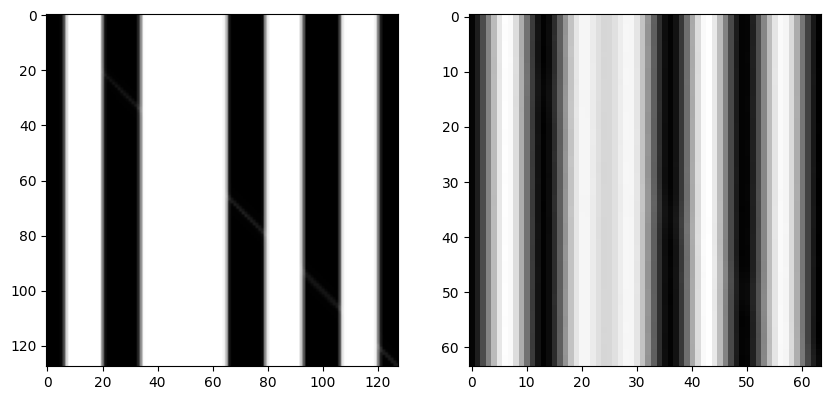

In [367]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(idct,cmap='gray')

In [368]:
print("Compression Ratio:",round((np.product(np.shape(image)))/(np.product(np.shape(dct)))))

Compression Ratio: 64


## Comparasion
1. Huffman Coding   
    - Pros:
        - Huffman coding is better than others even when there is no spatial redundancy.
        - It is a lossless coding algorithm.   
        - This algo will work even if there is noise.
    - Cons:
        - When sending the data, we need to send the huffman code tree as well for exact reconstruction which can use up the space.
        - If the probability distribution is uniform then there won't much compression.
        - Its timecomplexity if $O(N*log(N))$.
2. LZW:
    - Pros:
        - It takes $O(n)$ time for encoding.
        - It is suitable when there is a repetation of a pattern in the image.
    - Cons:
        - It will fail if there is no pattern redundancy.
        - The overall bitlength increases of each word because there are more than 256 elements in the dictionary.
3. RLE:
    - Pros:
        - It takes O(n) time for encoding.
        - It works best if the image has uniform regions.
    - Cons:
        - If the image is too noisy then the compressed image might use more space than the origional.
        - If there is no uniformaty in the image the size of compressed image will increase.
4. DCT:
    - Pros:
        - DCT is used in JPEG compression.
        - Compression Ratio of DCT is very high as compared to other method used above.
    - Cons:
        - It is a lossy compression
        - For 2D DCT the time complexity is $O(N^2log_2^N)$
    